# MOVIELENS RECOMMENDATION SYSTEMS


### Collaborators
- 1.Ruth Kitasi
- 2.Agatha Nyambati
- 3.Joseline Apiyo
- 4.Cecilia Ngunjiri
- 5.John Mbego
- 6.Leonard Koyio

![movie-img.jpeg](movie-img.jpeg)

# 1.BUSINESS UNDERSTANDING

## 1.1 Overview

In today's world of massive data growth, recommendation systems have become essential tools for filtering information and enhancing user experiences. These systems help users find relevant content by analyzing their past behaviors, such as search queries or browsing histories.

Companies like YouTube and Spotify use recommendation algorithms to suggest the next video or curate personalized playlists based on user preferences.

In line with our project objective we aim to harness the power of data analysis to build a movie recommendation system that provides users with personalized movie suggestions.

By analyzing user ratings of other movies, we can generate tailored recommendations that align with individual preferences. The goal is to develop a model that delivers the top 5 movie recommendations for each user, optimizing their viewing experience based on their previous interactions.

## 1.2 Problem statement

With the vast amount of content available on streaming platforms, users often feel overwhelmed by choices, making it difficult to discover movies that align with their preferences. Traditional search methods fall short in addressing this challenge, resulting in a less satisfying user experience and decreased engagement.

MovieLens has tasked our team of data scientists with optimizing their recommendation system through data-driven approaches. By analyzing user behaviors and preferences, we aim to enhance the system's ability to deliver personalized movie recommendations.

## 1.3 Objectives

- Develop a model to provide personalized top 5 movie recommendations for users based on their ratings and preferences, utilizing collaborative filtering techniques.

- Determine the rating frequency of users based on various features, such as genre, director, and release year, to identify patterns in user preferences.

- Analyze key features that contribute to the popularity of trending movies to enhance the effectiveness of the recommendation system in suggesting relevant content.

- Implement collaborative filtering techniques, including both user-based and item-based methods, to segment users and items, improving the accuracy of personalized recommendations.

- Create a solution to address the cold start problem by recommending popular and trending movies to new users with no prior ratings, ensuring an engaging initial experience.


## 1.4 Data Limitations.

While the MovieLens dataset is valuable for building a movie recommender system, it has some limitations:

* Limited Temporal Coverage: The dataset spans a specific time period, which may not capture the most recent trends or preferences.

* Cold-Start Problem: The system may struggle to provide recommendations for new users or movies with limited ratings or tags.

* Bias in Ratings: User ratings can be influenced by various factors, such as popularity bias or groupthink, which may affect the accuracy of recommendations.

# 2. DATA UNDERSTANDING

## 2.1 Data Source

The dataset https://grouplens.org/datasets/movielens/, was obtained from the GroupLens website which  is a well-known resource for research in recommendation systems and data analysis.

The Movielens comprises of four files:

##### 1. `links.csv`
Contains identifiers linking MovieLens movies to external databases (IMDB and TMDb). The structure is:

| Column    | Description                                            |
|-----------|--------------------------------------------------------|
| `movieId` | ID representing each movie in the MovieLens dataset    |
| `imdbId`  | Corresponding movie ID from IMDb                       |
| `tmdbId`  | Corresponding movie ID from The Movie Database (TMDb)  |



##### 2. `movies.csv`
This file includes movie titles and their associated genres. The data is structured as follows:

| Column    | Description                                            |
|-----------|--------------------------------------------------------|
| `movieId` | ID representing each movie                             |
| `title`   | Movie title, including the year of release (e.g., *Toy Story (1995)*) |
| `genres`  | Pipe-separated list of genres (e.g., *Animation|Children's|Comedy*)   |



##### 3. `ratings.csv`
This file contains explicit user ratings for movies on a **5-star scale**. The data is structured as:

| Column   | Description                                   |
|----------|-----------------------------------------------|
| `userId` | Anonymized ID representing each user          |
| `movieId`| ID representing each movie                    |
| `rating` | User rating for the movie (0.5 to 5.0 stars)  |
| `timestamp` | UNIX timestamp when the rating was made     |

Ratings are sorted first by `userId`, then by `movieId`.

##### 4. `tags.csv`
Tags represent user-generated metadata (e.g., short descriptions or labels). The structure is:

| Column   | Description                                    |
|----------|------------------------------------------------|
| `userId` | Anonymized ID representing each user           |
| `movieId`| ID representing each movie                     |
| `tag`    | User-assigned tag for the movie                |
| `timestamp` | UNIX timestamp when the tag was added       |

Like ratings, tags are sorted by `userId` and then by `movieId`


  

## 2.2 Data loading and Inspection


In [169]:
## Importing the libraries

import pandas as pd
import numpy as np


In [116]:
#Creating a function to read the files.

def read_csv_file(file_name):

    try:
        df = pd.read_csv(file_name)
        print(f"{file_name} read successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: {file_name} not found!")
    except Exception as e:
        print(f"An error occurred while reading {file_name}: {e}")


In [117]:
#using the fucntion to read files.

links = read_csv_file("ml-latest-small\links.csv")
movies = read_csv_file("ml-latest-small\movies.csv")
ratings = read_csv_file(r"ml-latest-small\ratings.csv")
tags = read_csv_file("ml-latest-small/tags.csv")

ml-latest-small\links.csv read successfully!
ml-latest-small\movies.csv read successfully!
ml-latest-small\ratings.csv read successfully!
ml-latest-small/tags.csv read successfully!


In [118]:
# checking for basic statistics of our data sets

def basic_stats(dataset, dataset_name):
    print('dataset: ',dataset_name )
    print('\n')
    dataset.info()
    print('-------------------')
    print('\n')
    print(dataset.describe())
    print('-------------------')
    print('\n')
    print('shape: ',dataset.shape)

In [119]:
# links dataset summary

basic_stats(links, 'Links file')

dataset:  Links file


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
-------------------


             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    193609.000000  8.391976e+06  525662.000000
-------------------


shape:  (9742, 3)


In [120]:
# movies dataset summary

basic_stats(movies, 'Movies file stats summary report')

dataset:  Movies file stats summary report


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
-------------------


             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000
-------------------


shape:  (9742, 3)


In [121]:
# Rating dataset summary

basic_stats(ratings, 'Rating file stats summary report')

dataset:  Rating file stats summary report


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
-------------------


              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max    

In [122]:
# movies dataset summary

basic_stats(tags, 'Tags file stats summary report')

dataset:  Tags file stats summary report


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
-------------------


            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.000000  1.537099e+09
-------------------


shape:  (3683, 4)


#### Observations made from data undertanding

- All the four files have a common feature which is the movieID column.

- The links and the movie datasets have equal number of rows of 9742.

- Each dataset presents a mixed type of data.(int64, object and float64)

## 2.3 Merging Files

Given that the four datasets share a common feature, the movie ID, we will use this column to perform a merge, consolidating the datasets into a single file. This approach ensures not only the integration of information from different sources but also enhances data completeness and facilitates more thorough analysis.

In [123]:
## Merging files on the common feature the MovieID

##Step 1: Merging the movies and the links datasets.
movies_links_merged =  pd.merge(movies, links, on='movieId', how='inner')
movies_links_merged.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [124]:
##Step 2: Merging the movies_links_merged and ratings datasets on movieId

movies_links_ratings_merged =pd.merge(ratings, movies_links_merged,on='movieId', how='inner')
movies_links_ratings_merged.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0


In [125]:
##Step 3: Merging the results of movies_links_rating_merged with the tags dataset.
final_merge =  pd.merge(movies_links_ratings_merged, tags, on=['movieId','userId'])
final_merge.head()

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,old,1143424860


In [126]:
## Checking the number of rows and colums of our final merged dataset

rows, colums = final_merge.shape
print(f'The final merged dataset contains {rows} rows and {colums} colums')

The final merged dataset contains 3476 rows and 10 colums


In [127]:
##Getting the conside summary of the final merged dataset

final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       3476 non-null   int64  
 1   movieId      3476 non-null   int64  
 2   rating       3476 non-null   float64
 3   timestamp_x  3476 non-null   int64  
 4   title        3476 non-null   object 
 5   genres       3476 non-null   object 
 6   imdbId       3476 non-null   int64  
 7   tmdbId       3476 non-null   float64
 8   tag          3476 non-null   object 
 9   timestamp_y  3476 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 298.7+ KB


The output shows that the final_merged dataset contains 3 types as follows:
- 2 float64
- 6 int664
- 3 Object

The memory usage of the final merged dataset is approximately 21.4 MB. This suggests that the dataset has grown significantly after merging, especially due to the repetition of movie information across different user ratings and tag.

High Movie Engagement: The fact that the merged dataset contains 233,213 rows while the ratings dataset had 100,836 rows suggests that multiple users have rated, tagged, or interacted with the same movie, indicating high engagement for some movies.


In [128]:
final_merge.describe()

,userId,movieId,rating,timestamp_x,imdbId,tmdbId,timestamp_y
count,3476.000000,3476.000000,3476.000000,3.476000e+03,3.476000e+03,3476.000000,3.476000e+03
mean,429.785386,28009.502301,4.016830,1.297281e+09,4.920095e+05,33499.696203,1.323525e+09
std,161.552990,44138.125029,0.856925,2.038080e+08,8.193528e+05,75172.715180,1.731554e+08
min,2.000000,1.000000,0.500000,9.746667e+08,1.234900e+04,11.000000,1.137179e+09
25%,424.000000,1261.500000,3.500000,1.100120e+09,9.740875e+04,680.000000,1.138032e+09
50%,474.000000,4492.000000,4.000000,1.281766e+09,1.207750e+05,7708.000000,1.279956e+09
75%,523.250000,45499.000000,5.000000,1.498457e+09,3.953342e+05,19913.000000,1.498457e+09
max,610.000000,193565.000000,5.000000,1.537099e+09,5.580390e+06,503475.000000,1.537099e+09


userId_x and userId_y: The user IDs range from 1 to 610, which shows that there are 610 unique users in the dataset

Each column has 233,213 entries, meaning no missing values for the columns shown (movieId, imdbId, tmdbId, userId_x, rating, timestamp_x, userId_y, timestamp_y).

Movie IDs range from 1 to 193565, suggesting a large dataset covering a wide variety of movies.
The 50th percentile (50%, or median) movie ID is 1198, indicating that half the movies have an ID less than 1198.
The average (mean) movie ID is 12319.99, which is much higher than the median, indicating a right-skewed distribution of movie IDs (a few movies with very high IDs).

imdbId and tmdbId: Similarly, the IMDb IDs and TMDB IDs show a broad range from 12,349 to 5,580,390 (IMDb) and from 11 to 503,475 (TMDB), also suggesting a wide variety of movie records. The high standard deviation indicates significant variation in these IDs.

The mean rating is approximately 3.97, indicating that, on average, users gave higher ratings (closer to 4)

The mean timestamp (timestamp_x) is about 1.213 billion, which corresponds to around 2008 and maximum timestamp suggests ratings were given around 2018.

Right-skewed Distribution: Both movieId and rating columns exhibit right-skewed distributions. This could influence modeling choices, as the majority of movies or users may fall within a specific subset of the range.

In [129]:
#creating a copy of the final merge for to perform data cleaning
Movies_df = final_merge
Movies_df.head()

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,old,1143424860


## 3.DATA CLEANING

Now that we have merged our dataset, we will take the following steps to ensure it is clean and ready for analysis:

1. `Checking and handling duplicates columns` to avoid redundancy.

2. `Renaming columns` to improve readability.

3. `Case Conversion` to ensure that all our headers are standadized.

4. `Checking for missing` and address them appropriately.

5. `Ensure consistent data types` across all columns.

6. `Creating new features from existing features` for precise EDA.


## 3.1.Checking and handling duplicates colums

In [130]:
#Compare userI_X and user1D_y to check id they have columns for identical values
Movies_df['timestamp_x'].equals(Movies_df['timestamp_y'])

False

## 3.2 Removing Unnceccesary columns.

In [131]:
#Removing unnecessary colums for our model.
Movies_df.drop(['movieId','imdbId','tmdbId','timestamp_y'],axis=1, inplace=True)

In [132]:
Movies_df.sample(n=5)

,userId,rating,timestamp_x,title,genres,tag
3177,567,3.0,1525286967,Beasts of No Nation (2015),Drama|War,Moving
2219,474,4.5,1090241137,"Killing, The (1956)",Crime|Film-Noir,heist
307,474,3.5,1118667194,Platoon (1986),Drama|War,Vietnam
858,567,4.5,1525283516,In the Mood For Love (Fa yeung nin wa) (2000),Drama|Romance,Beautiful
2605,62,4.0,1528934997,Anchorman 2: The Legend Continues (2013),Comedy,comedy


## 3.3 Renaming columns.

In [133]:
#Renaming the timestamp_x column
Movies_df.rename(columns={'timestamp_x':'timestamp'}, inplace=True)

#checking the dataset after remaming our desired column
Movies_df.head()

,userId,rating,timestamp,title,genres,tag
0,336,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,474,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,567,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,289,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,moldy
4,289,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,old


## 3.4 Case Coversion.

In [134]:
#converting our headers to title case from the current lowercase.
Movies_df.rename(columns=lambda x: x.title(), inplace=True)

##viewing our dataset our the headers converstion
Movies_df.tail()


,Userid,Rating,Timestamp,Title,Genres,Tag
3471,567,3.5,1525286512,It Comes at Night (2017),Horror|Mystery|Thriller,Suspenseful
3472,567,3.0,1525287581,Mother! (2017),Drama|Horror|Mystery|Thriller,allegorical
3473,567,3.0,1525287581,Mother! (2017),Drama|Horror|Mystery|Thriller,uncomfortable
3474,567,3.0,1525287581,Mother! (2017),Drama|Horror|Mystery|Thriller,unsettling
3475,606,4.0,1171324428,Night of the Shooting Stars (Notte di San Lore...,Drama|War,World War II


## 3.5 Checking and Handling Missing Values.

In [135]:
if Movies_df.isnull().values.any():
    print(True)
else:
    print(None)

None


The output confirms that our movie_df has no missing values.

## 3.6 Ensuring consistent data types.

In [136]:
#Checking the datatype of each column
print(Movies_df.dtypes)

Userid         int64
Rating       float64
Timestamp      int64
Title         object
Genres        object
Tag           object
dtype: object


After removal of unccesary colums, we can counclude now that thedataset has
  - One feature of float64 
     - Rating
  - Two features of int64
    - userId
    - timestamp
  - Three features of object
    - Title
    - Genres
    - Tags

For accurate analysis, we will proceed and convert our timestamp from int64 to data and time

In [137]:
# Creating a new dataframe
Movies= pd.DataFrame(Movies_df)

# Converting the timestamp_x column to datetime format
Movies['Timestamp'] = pd.to_datetime(Movies['Timestamp'], unit='s')

# Displaying the DataFrame
Movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Userid     3476 non-null   int64         
 1   Rating     3476 non-null   float64       
 2   Timestamp  3476 non-null   datetime64[ns]
 3   Title      3476 non-null   object        
 4   Genres     3476 non-null   object        
 5   Tag        3476 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 190.1+ KB


Now out timestamp feature has succefully been converte to to a datetime column

## 3.7 Creating new features from existing features

In [140]:
# Create 'Date' from the timeshtamp 
Movies['Timetamp_date'] = Movies['Timestamp'].dt.date


#viewing the dataset
Movies.head()

,Userid,Rating,Timestamp,Title,Genres,Tag,Timetamp_date
0,336,4.0,2005-07-24 17:48:49,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,2005-07-24
1,474,4.0,2001-01-04 02:36:00,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,2001-01-04
2,567,3.5,2018-05-02 18:33:21,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun,2018-05-02
3,289,2.5,2006-03-27 01:57:37,Grumpier Old Men (1995),Comedy|Romance,moldy,2006-03-27
4,289,2.5,2006-03-27 01:57:37,Grumpier Old Men (1995),Comedy|Romance,old,2006-03-27


In [146]:
# Extracting the year from the Title and creating a new column year_of_production
Movies_df['year_of_production'] = Movies_df['Title'].str.extract(r'\((\d{4})\)')

#viewing the dataset
Movies_df.sample(n=5)

,Userid,Rating,Timestamp,Title,Genres,Tag,Timetamp_date,year_of_production
1672,305,3.0,2018-03-10 18:37:35,Anchorman: The Legend of Ron Burgundy (2004),Comedy,stupid,2018-03-10,2004
1889,567,3.0,2018-05-02 18:54:28,Pi (1998),Drama|Sci-Fi|Thriller,cerebral,2018-05-02,1998
3295,474,4.0,2003-08-20 12:57:14,"Blue Angel, The (Blaue Engel, Der) (1930)",Drama,singers,2003-08-20,1930
112,599,5.0,2017-06-26 06:01:07,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,disjointed timeline,2017-06-26,1994
845,474,4.5,2004-04-05 15:01:10,Almost Famous (2000),Drama,journalism,2004-04-05,2000


After creating the two new features, `timestamp_date` and `year_of_production`, the next step is to check for any missing values in the dataset.

In [149]:
# Check for missing values in the dataset
missing_values = Movies_df.isnull().sum()

# Print columns that have missing values
print(missing_values[missing_values > 0])


year_of_production    3
dtype: int64


The year of prodution colum has 3 missing value.

Since this is too low, we will proceed and delete the rows.

In [150]:
# Remove rows with any missing values
Movies_df.dropna(inplace=True)

In [151]:
if Movies_df.isnull().values.any():
    print(True)
else:
    print(None)

None


In [152]:
#checkingthe datatypes
Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 0 to 3475
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Userid              3473 non-null   int64         
 1   Rating              3473 non-null   float64       
 2   Timestamp           3473 non-null   datetime64[ns]
 3   Title               3473 non-null   object        
 4   Genres              3473 non-null   object        
 5   Tag                 3473 non-null   object        
 6   Timetamp_date       3473 non-null   object        
 7   year_of_production  3473 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 244.2+ KB


Now that we have confirmed that we do not have any missing values, we will proceed and conver the year of production to and int type from the current object type.

In [157]:
# Convert the year_of_production column to integer
Movies_df['year_of_production'] = Movies_df['year_of_production'].astype(int)


In [159]:
#runnnig our inal cleaned dataset ready for EDA
Movies_df.head(2)

,Userid,Rating,Timestamp,Title,Genres,Tag,Timetamp_date,year_of_production
0,336,4.0,2005-07-24 17:48:49,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,2005-07-24,1995
1,474,4.0,2001-01-04 02:36:00,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,2001-01-04,1995


We have no duplicated rows in our dataset. This means that each row is unique.

# 4.0 EXPLANATORY DATA ANALYSIS

In [170]:
#Improting libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

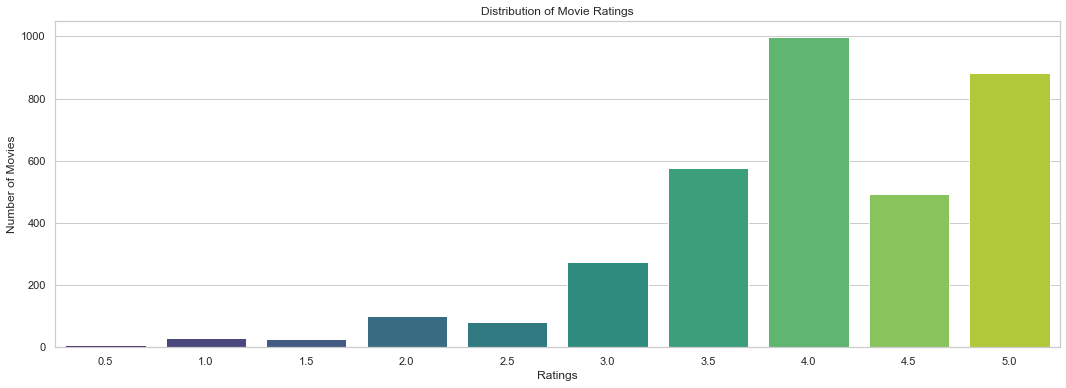

In [179]:

def plot_rating_distribution(data):
   
    # Count the number of movies for each rating
    rating_counts = data['Rating'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(18, 6))
    sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Ratings')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=0)
    plt.show()

# Example usage:
plot_rating_distribution(Movies_df)  # Display the rating distribution plot


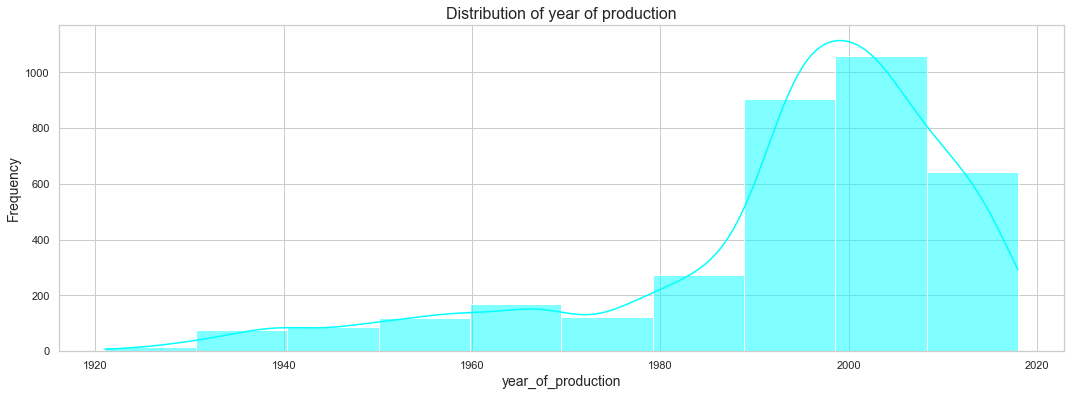

In [174]:
# Create a histogram for the Rating feature
plt.figure(figsize=(18, 6))
sns.histplot(Movies_df['year_of_production'], bins=10, kde=True, color='cyan')

# Add labels and title
plt.title('Distribution of year of production', fontsize=16)
plt.xlabel('year_of_production', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

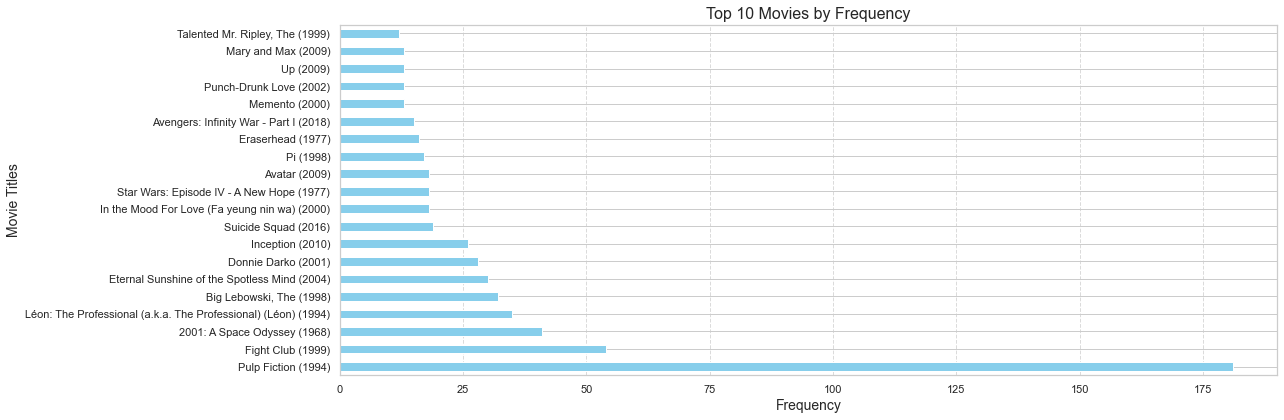

In [188]:
import matplotlib.pyplot as plt

# Get the frequency of the top 10 movie titles
top_10_titles = Movies_df['Title'].value_counts().head(20)

# Plotting the transposed bar graph
plt.figure(figsize=(18, 6))
top_10_titles.plot(kind='barh', color='skyblue')  # 'barh' for horizontal bars
plt.title('Top 10 Movies by Frequency', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Movie Titles', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Horizontal grid
plt.tight_layout()  # Adjusts the layout to make room for the labels
plt.show()


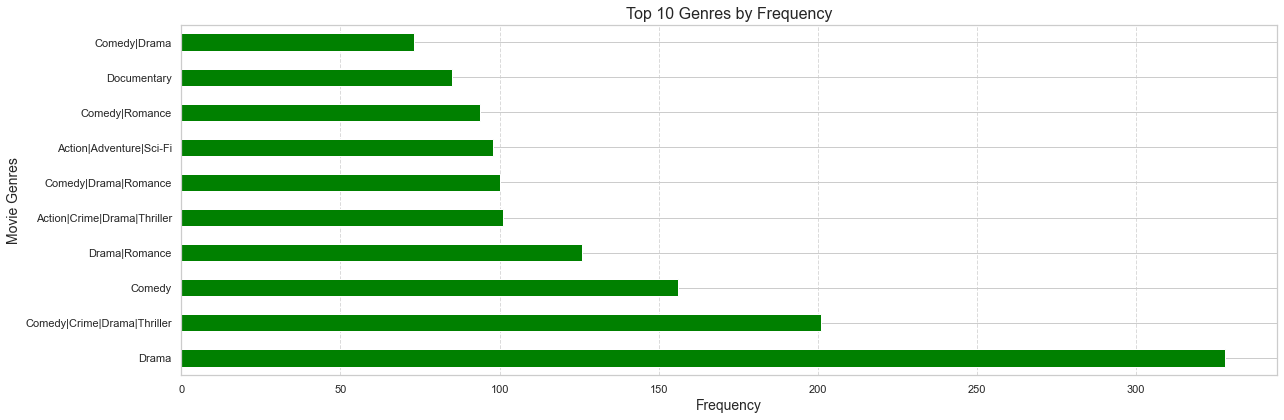

In [202]:
import matplotlib.pyplot as plt

# Get the frequency of the top 10 movie titles
top_10_Genres = Movies_df['Genres'].value_counts().head(10)

# Plotting the transposed bar graph
plt.figure(figsize=(18, 6))
top_10_titles.plot(kind='barh', color='green')  # 'barh' for horizontal bars
plt.title('Top 10 Genres by Frequency', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Movie Genres', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Horizontal grid
plt.tight_layout()  # Adjusts the layout to make room for the labels
plt.show()

In [203]:
from collections import Counter

genres_list = Movies_df['Genres'].str.split('|').sum()
genre_counts = Counter(genres_list)
genre_counts

Counter({'Adventure': 582,
         'Animation': 231,
         'Children': 183,
         'Comedy': 1105,
         'Fantasy': 283,
         'Romance': 585,
         'Mystery': 388,
         'Thriller': 1065,
         'Crime': 779,
         'Action': 788,
         'Drama': 2000,
         'War': 153,
         'Sci-Fi': 641,
         'Western': 59,
         'Horror': 209,
         'Musical': 117,
         'Film-Noir': 43,
         'IMAX': 152,
         'Documentary': 97})

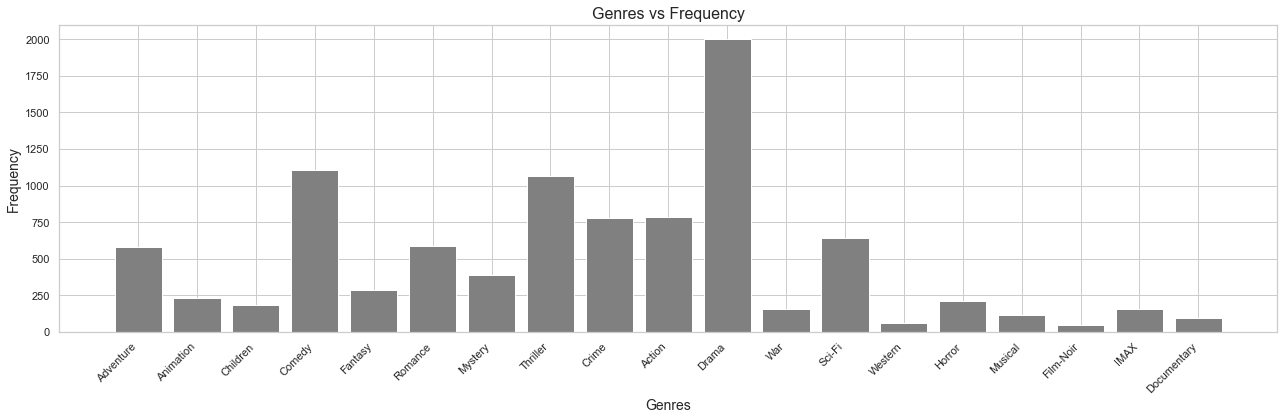

In [205]:
#plotting genre against frequency.
#  Separate the genre names and their respective counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create a bar chart
plt.figure(figsize=(18, 6))
plt.bar(genres, counts, color='gray')

# Add title and labels
plt.title('Genres vs Frequency', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.show()


* The gragh shows that the genres "Drama" and "Comedy" are the most popular among the movies in the dataset, with significantly higher counts compared to other genres.

* Genres like "Action," "Thriller," and "Crime" have moderate levels of popularity, with counts falling somewhere between the most and least popular categories.
* Genres such as "Western," "Horror," "Musical," "Film-Noir," "IMAX," and "Documentary" have relatively low counts, indicating they are less frequently represented in the dataset.
* There is a category labeled "(no genres listed)" with a non-zero count, suggesting that some movies in the dataset might not have any associated genre information.

# 5.0 MODELLING